
# Due Dates

Thursday, Sept. 13
* Code - Submit by 11:59PM 
* Textbook - Submit in class

# Textbook Problems

* 1.1
* 1.3
* 1.5
* 1.9
* 1.23


# Oh hey.

Welcome. Let's learn to do stuff. 

# What it is

This is a Jupyter notebook. It is a web interface that let's you intersperse cells of code and text. 



In [1]:
# This is code to load the assignment.
# You'll need to run this code do the assignment.
from loadAssignment import loadAssignment
Assignment, Questions, Submit = loadAssignment(0)


# Functions

We will write a lot of functions in this class



In [2]:
# This is a simple function
def squared(x):
    return x**2

print(1,'squared is',squared(1))
print(2,'squared is',squared(2))

1 squared is 1
2 squared is 4


In [3]:
# This is more complex function
def add_three_numbers(x,y,z):
    the_sum = x + y + z
    return the_sum

print('I added some numbers:',add_three_numbers(1,2,3))

I added some numbers: 6



# Question 0

The logistic map is simple dynamic system of the form

\begin{equation*}
x_{n+1} = r x_n (1-x_n).
\end{equation*}


Write a function called `logisticMap` that computes the value of the logistic map. 
In other words, given inputs `x` and `r` (in that order), your function 
should compute the next value of `x`.



In [4]:
def logisticMap(x,r):
    return x*r*(1-x)

Questions[0].checkAnswer(logisticMap)

Spot on.
A score of 1 was entered for Question 0



# Lists

Lists are very common. Here is a list of strings:



In [5]:
margotList = ['Margot','is','a','dog.']


We can add elements to an existing list using `append`.



In [6]:
margotList.append('She')
margotList.append('loves')
margotList.append('to')
margotList.append('jump')
margotList.append('the')
margotList.append('lake.')

print(margotList)

['Margot', 'is', 'a', 'dog.', 'She', 'loves', 'to', 'jump', 'the', 'lake.']



Here is a list of numbers


In [7]:
piList = [3,1,4,1,5,9]


Lists are very general, and we can mix and match things.



In [8]:
mixedList = ['Margot','is',4,'it','is',True]

# Let's look at the data types in this list:
for item in mixedList:
    print(type(item))

<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'bool'>



# Question 1

Create a list that has three elements, in this order

* A string with the name of the current month 
* The number of planets in the solar system
* A string with the name of the state where class is held



In [9]:
myList = ['september',8,'minnesota']

Questions[1].checkAnswer(myList)

Oh yeah!
A score of 1 was entered for Question 1



# For Loops

One of the most common programming patterns is the `for` loop. We will use it a lot. In Python, we loop over elements of a list. Here are some examples



In [10]:
# A simple loop over integers 
for i in range(10):
    wildlyLargeNumber = i+6
    print(i,wildlyLargeNumber)

# A loop over the list of words
for word in margotList:
    print(word)

0 6
1 7
2 8
3 9
4 10
5 11
6 12
7 13
8 14
9 15
Margot
is
a
dog.
She
loves
to
jump
the
lake.



# Question 2

Say the initial condition $x_0$ and parameter $r$ are given by:



In [11]:
x0 = .5
r = 3.7


Compute the first 100 values of the logistic map dynamic system, $x_0,\ldots,x_{99}$. Store them in a list called `X_list`



In [12]:
# Call your list 
X_list = []


x = x0

for _ in range(100):
    X_list.append(x)
    x = logisticMap(x,r)

Questions[2].checkAnswer(X_list)

Hoorah!
A score of 1 was entered for Question 2



If all went well, we have a simulation of the [logistic map](https://en.wikipedia.org/wiki/Logistic_map). Depending on the value of $r$, the simulation can either converge to a fixed point, oscillate around a finite collection of values, or ramble around chaotically. Let's see what yours looks like.



Text(0, 0.5, 'x')

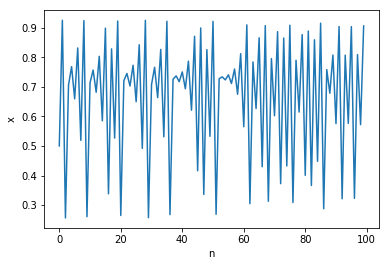

In [13]:
# This is the standard Python plotting library
import matplotlib.pyplot as plt
# This is a "cell magic" which enables plotting in Jupyter
%matplotlib inline
plt.plot(X_list)
plt.xlabel('n')
plt.ylabel('x')


# Numpy and Scipy

The main libraries for scientific computing in Python or `Numpy` and `Scipy`. They have many of the underlying algorithms that we will need in this course. 

As an example, we will use the `scipy.optimize.curve_fit` function to fit 
monthly average temperature data taken at MSP. 




Text(0, 0.5, 'Temperature (F)')

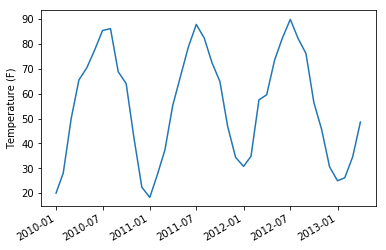

In [14]:
import data
import numpy as np
YTrain,DateTrain,YTest,DateTest = data.extractMonthlyTempData()

import datetime as dt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_ticks(DateTrain[::6])
plt.plot(DateTrain,YTrain)
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature (F)')


As a warm-up, we will consider a simple linear model:

\begin{equation*}
y_i = a t_i + b + v_i
\end{equation*}
where $y_i$ is the temperature,$t_i$ is the date (in months from the start date),  and $v_i$ is noise. The parameters are given by $a$ and $b$. 

This leads to a least-squares cost of:

\begin{equation*}
J = \sum_{i=1}^n (y_i - a t_i - b)^2 
\end{equation*}

Let's try to fit this data using the `curve_fit` command. 



Text(0, 0.5, 'Temperature (F)')

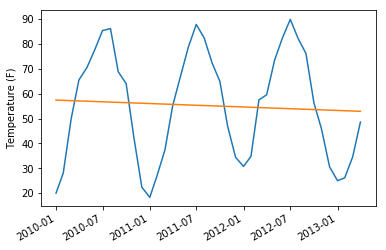

In [15]:
import numpy as np
import scipy.optimize as opt

# This is our model function 
def linModel(t,a,b):
    return t * a + b
# We have to be a bit careful when defining our model.
# It should take a vector of inputs, t,
# and return a vector of outputs of the same size.

# Put the time in months since start
TTrain = np.arange(len(DateTrain))
# Fit the model
pOpt,_ = opt.curve_fit(linModel,TTrain,YTrain)

aOpt,bOpt = pOpt
YFit = linModel(TTrain,aOpt,bOpt)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_ticks(DateTrain[::6])
plt.plot(DateTrain,YTrain)
plt.plot(DateTrain,YFit)
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature (F)')


That was okay, I guess. However, it doesn't capture the seasonal behavior of temperature.





# Question 3

Use `curve_fit` to fit a model of the form:

\begin{equation*}
y_i = a \sin\left(
\frac{2\pi t_i}{12} + c
\right) + b + v_i
\end{equation*}

Now the parameters are $a,b,c$.  



In [16]:
# Find aOpt, bOpt, cOpt, the optimal parameters
# The command np.sin will help.



def sineFun(t,a,b,c):
    return a * np.sin(2*np.pi*t / 12 + c) + b

pOpt,_ = opt.curve_fit(sineFun,TTrain,YTrain)
aOpt,bOpt,cOpt = pOpt
Questions[3].checkAnswer(aOpt,bOpt,cOpt)

Phenomenal
A score of 1 was entered for Question 3



# Question 4

Now we'd like to see how your model does on the test dataset, `YTest`. These are data were not used to compute the parameters. The corresponding times in months since the start are given by:



In [17]:
TTest = np.arange(len(DateTrain),len(DateTrain)+len(DateTest))
print(TTest)

[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]



Make a plot with `DateTest` on the x-axis and temperature on the y-axis. Your plot should have two lines: 
* One line for the measured data, `YTest`
* One line for the data predicted from the values in `TTest`.



Huzzah.
A score of 1 was entered for Question 4


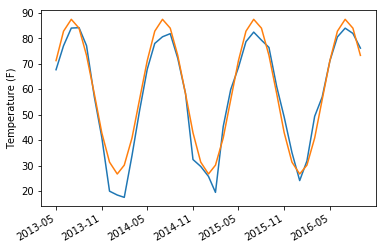

In [18]:
YPred = sineFun(TTest,aOpt,bOpt,cOpt)

plt.plot(DateTest,YTest)
plt.plot(DateTest,YPred)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_ticks(DateTest[::6])
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature (F)')

Questions[4].checkAnswer()


# Final Score

You can run this code to see all of your scores.



In [19]:
Assignment.showResults()

Problem 0: 1
Problem 1: 1
Problem 2: 1
Problem 3: 1
Problem 4: 1

Total: 5 / 5



# Submission

Save your work and run this cell to submit. It will only work if you have the internet.





# Final Score

You can run this code to see all of your scores.



In [20]:
Assignment.showResults()

Problem 0: 1
Problem 1: 1
Problem 2: 1
Problem 3: 1
Problem 4: 1

Total: 5 / 5



# Submission

Save your work and run this cell to submit. It will only work if you have the internet.

